Found 1920 images belonging to 3 classes.
Found 822 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 566ms/step - accuracy: 0.6344 - loss: 0.8822

60/60 ━━━━━━━━━━━━━━━━━━━━ 56s 873ms/step - accuracy: 0.6354 - loss: 0.8797 - val_accuracy: 0.4976 - val_loss: 1.3661 - learning_rate: 1.0000e-04
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 577ms/step - accuracy: 0.7824 - loss: 0.5623

60/60 ━━━━━━━━━━━━━━━━━━━━ 50s 829ms/step - accuracy: 0.7825 - loss: 0.5618 - val_accuracy: 0.5036 - val_loss: 1.4920 - learning_rate: 1.0000e-04
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 583ms/step - accuracy: 0.8114 - loss: 0.4866

60/60 ━━━━━━━━━━━━━━━━━━━━ 50s 834ms/step - accuracy: 0.8114 - loss: 0.4864 - val_accuracy: 0.7032 - val_loss: 0.6811 - learning_rate: 1.0000e-04
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.8225 - loss: 0.4535

60/60 ━━━━━━━━━━━━━━━━━━━━ 51s 844ms/step - accuracy: 0.8227 - loss: 0.4531 - val_accuracy: 0.8309 - val_loss: 0.4541 - learning_rate: 1.0000e-04
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 55s 915ms/step - accuracy: 0.8372 - loss: 0.4035 - val_accuracy: 0.7251 - val_loss: 0.7301 - learning_rate: 1.0000e-04
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 565ms/step - accuracy: 0.8346 - loss: 0.4095

60/60 ━━━━━━━━━━━━━━━━━━━━ 49s 824ms/step - accuracy: 0.8347 - loss: 0.4093 - val_accuracy: 0.8650 - val_loss: 0.3575 - learning_rate: 1.0000e-04
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 82s 826ms/step - accuracy: 0.8624 - loss: 0.3650 - val_accuracy: 0.8394 - val_loss: 0.4703 - learning_rate: 1.0000e-04
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 577ms/step - accuracy: 0.8706 - loss: 0.3469

60/60 ━━━━━━━━━━━━━━━━━━━━ 50s 839ms/step - accuracy: 0.8705 - loss: 0.3470 - val_accuracy: 0.8723 - val_loss: 0.3735 - learning_rate: 1.0000e-04
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 563ms/step - accuracy: 0.8613 - loss: 0.3461
Epoch 9: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
60/60 ━━━━━━━━━━━━━━━━━━━━ 48s 808ms/step - accuracy: 0.8614 - loss: 0.3461 - val_accuracy: 0.7725 - val_loss: 0.7363 - learning_rate: 1.0000e-04
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 55s 918ms/step - accuracy: 0.8788 - loss: 0.3095 - val_accuracy: 0.8710 - val_loss: 0.4155 - learning_rate: 5.0000e-05
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 49s 815ms/step - accuracy: 0.8841 - loss: 0.2877 - val_accuracy: 0.8358 - val_loss: 0.4638 - learning_rate: 5.0000e-05


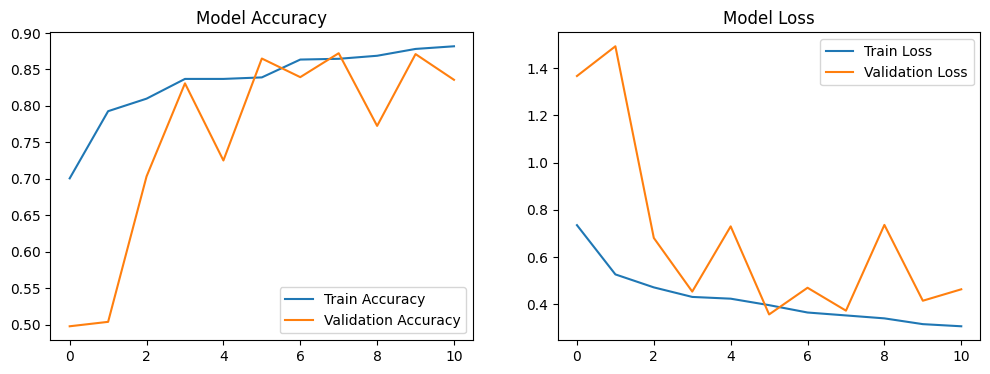

26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 555ms/step


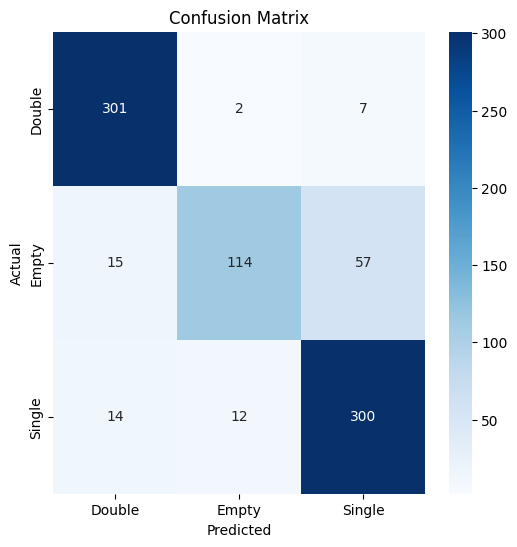

Final Validation Accuracy: 87.23%


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 📌 Set the base directory for your dataset
base_path = "/content/drive/MyDrive/avv_data/images/1s_segment_raw/1s_segment_raw/train_val_photos"

# 📌 Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values (0-1 range)
    validation_split=0.3,  # 80% training, 20% validation
    # rotation_range=30,     # Random rotation
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,       # Shear transformation
    zoom_range=0.2,        # Random zoom
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'
)

# 📌 Load Training Data
train_generator = datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),  # Resize images to match VGG16 input
    batch_size=32,
    class_mode='categorical',  # Multi-class classification
    subset='training',  # Training data
    shuffle=True
)

# 📌 Load Validation Data
validation_generator = datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Validation data
    shuffle=False  # No shuffle for validation
)

# 📌 Load Pre-trained VGG16 (Feature Extractor)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 📌 Freeze base model layers (we will fine-tune later)
for layer in base_model.layers[:15]:  # Freeze first 15 layers
    layer.trainable = False

# 📌 Build Custom Classifier on Top of VGG16
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Replaces Flatten(), better for feature extraction
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),  # Regularization to prevent overfitting
    Dense(3, activation='softmax')  # 3 output classes (AAVEmpty, AAVssDNA, AAVdsDNA)
])

# 📌 Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Small LR for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 📌 Callbacks: Early Stopping, LR Reduction, Checkpoint
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
checkpoint = ModelCheckpoint('best_vgg16_model.h5', monitor='val_accuracy', save_best_only=True)

# 📌 Train the Model
epochs = 20
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=[early_stop, lr_scheduler, checkpoint]
)

# 📌 Plot Training Results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

# 📌 Evaluate Model on Validation Set and Plot Confusion Matrix
validation_generator.reset()
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)  # Get predicted class indices
y_true = validation_generator.classes  # Get actual class indices
class_labels = list(validation_generator.class_indices.keys())  # Get class labels

# 📌 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 📌 Print Final Validation Accuracy
final_val_acc = max(history.history['val_accuracy']) * 100
print(f"Final Validation Accuracy: {final_val_acc:.2f}%")


Found 1920 images belonging to 3 classes.
Found 822 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 640ms/step - accuracy: 0.6537 - loss: 0.8451

60/60 ━━━━━━━━━━━━━━━━━━━━ 61s 932ms/step - accuracy: 0.6551 - loss: 0.8422 - val_accuracy: 0.8151 - val_loss: 0.7944 - learning_rate: 1.0000e-04
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 52s 864ms/step - accuracy: 0.8254 - loss: 0.4582 - val_accuracy: 0.7883 - val_loss: 0.6998 - learning_rate: 1.0000e-04
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 680ms/step - accuracy: 0.8246 - loss: 0.4250

60/60 ━━━━━━━━━━━━━━━━━━━━ 55s 926ms/step - accuracy: 0.8248 - loss: 0.4248 - val_accuracy: 0.8358 - val_loss: 0.6263 - learning_rate: 1.0000e-04
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 57s 963ms/step - accuracy: 0.8669 - loss: 0.3582 - val_accuracy: 0.7397 - val_loss: 0.6025 - learning_rate: 1.0000e-04
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 680ms/step - accuracy: 0.8838 - loss: 0.3128

60/60 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.8836 - loss: 0.3131 - val_accuracy: 0.8796 - val_loss: 0.3713 - learning_rate: 1.0000e-04
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 54s 909ms/step - accuracy: 0.8663 - loss: 0.3463 - val_accuracy: 0.7968 - val_loss: 0.5237 - learning_rate: 1.0000e-04
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 83s 912ms/step - accuracy: 0.8594 - loss: 0.3776 - val_accuracy: 0.8479 - val_loss: 0.4011 - learning_rate: 1.0000e-04
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 570ms/step - accuracy: 0.8969 - loss: 0.2928
Epoch 8: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
60/60 ━━━━━━━━━━━━━━━━━━━━ 52s 870ms/step - accuracy: 0.8968 - loss: 0.2930 - val_accuracy: 0.5365 - val_loss: 1.6131 - learning_rate: 1.0000e-04
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.8847 - loss: 0.2997 - val_accuracy: 0.8577 - val_loss: 0.4393 - learning_rate: 5.0000e-05
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 55s 912ms/step - accuracy: 0.8884 - loss: 

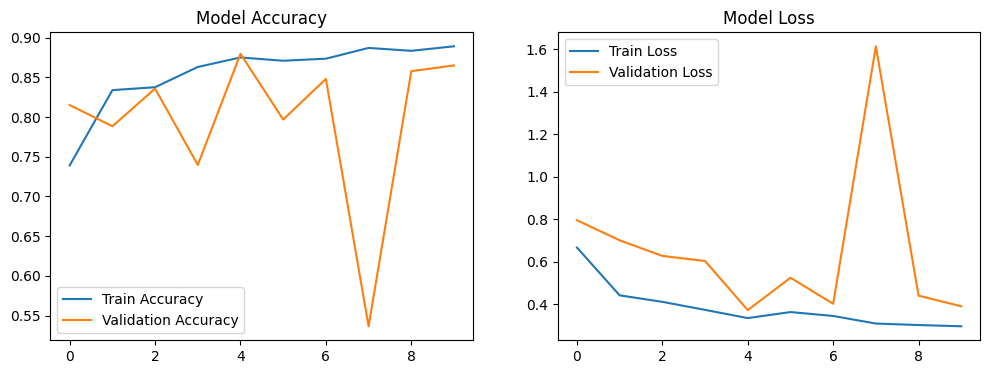

26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 610ms/step


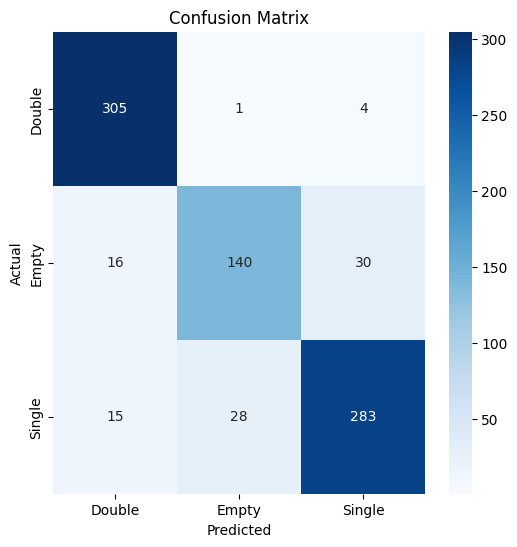

Final Validation Accuracy: 87.96%


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 📌 Set the base directory for your dataset
base_path = "/content/drive/MyDrive/avv_data/images/1s_segment_raw/1s_segment_raw/train_val_photos"

# 📌 Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values (0-1 range)
    validation_split=0.3,  # 80% training, 20% validation
    # rotation_range=30,     # Random rotation
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,       # Shear transformation
    zoom_range=0.2,        # Random zoom
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'
)

# 📌 Load Training Data
train_generator = datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),  # Resize images to match VGG16 input
    batch_size=32,
    class_mode='categorical',  # Multi-class classification
    subset='training',  # Training data
    shuffle=True
)

# 📌 Load Validation Data
validation_generator = datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Validation data
    shuffle=False  # No shuffle for validation
)

# 📌 Load Pre-trained VGG16 (Feature Extractor)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 📌 Freeze base model layers (we will fine-tune later)
for layer in base_model.layers[:15]:  # Freeze first 15 layers
    layer.trainable = False

# 📌 Build Custom Classifier on Top of VGG16
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Replaces Flatten(), better for feature extraction
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),  # Regularization to prevent overfitting
    Dense(3, activation='softmax')  # 3 output classes (AAVEmpty, AAVssDNA, AAVdsDNA)
])

# 📌 Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Small LR for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 📌 Callbacks: Early Stopping, LR Reduction, Checkpoint
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
checkpoint = ModelCheckpoint('best_vgg16_model.h5', monitor='val_accuracy', save_best_only=True)

# 📌 Train the Model
epochs = 20
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=[early_stop, lr_scheduler, checkpoint]
)

# 📌 Plot Training Results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

# 📌 Evaluate Model on Validation Set and Plot Confusion Matrix
validation_generator.reset()
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)  # Get predicted class indices
y_true = validation_generator.classes  # Get actual class indices
class_labels = list(validation_generator.class_indices.keys())  # Get class labels

# 📌 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 📌 Print Final Validation Accuracy
final_val_acc = max(history.history['val_accuracy']) * 100
print(f"Final Validation Accuracy: {final_val_acc:.2f}%")


Found 1920 images belonging to 3 classes.
Found 822 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.6890 - loss: 0.7293

60/60 ━━━━━━━━━━━━━━━━━━━━ 36s 418ms/step - accuracy: 0.6905 - loss: 0.7265 - val_accuracy: 0.3954 - val_loss: 1.6605 - learning_rate: 1.0000e-04
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 33s 366ms/step - accuracy: 0.8614 - loss: 0.4052 - val_accuracy: 0.3942 - val_loss: 2.4033 - learning_rate: 1.0000e-04
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.8624 - loss: 0.3576

60/60 ━━━━━━━━━━━━━━━━━━━━ 28s 464ms/step - accuracy: 0.8625 - loss: 0.3576 - val_accuracy: 0.5560 - val_loss: 0.7914 - learning_rate: 1.0000e-04
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.8749 - loss: 0.3265

60/60 ━━━━━━━━━━━━━━━━━━━━ 38s 410ms/step - accuracy: 0.8748 - loss: 0.3269 - val_accuracy: 0.8662 - val_loss: 0.4135 - learning_rate: 1.0000e-04
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 405ms/step - accuracy: 0.9112 - loss: 0.2732 - val_accuracy: 0.8418 - val_loss: 0.4277 - learning_rate: 1.0000e-04
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 323ms/step - accuracy: 0.8777 - loss: 0.3053 - val_accuracy: 0.5803 - val_loss: 1.3271 - learning_rate: 1.0000e-04
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.8893 - loss: 0.2797
Epoch 7: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 357ms/step - accuracy: 0.8893 - loss: 0.2799 - val_accuracy: 0.8029 - val_loss: 0.7131 - learning_rate: 1.0000e-04
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 26s 427ms/step - accuracy: 0.9039 - loss: 0.2508 - val_accuracy: 0.7579 - val_loss: 0.9661 - learning_rate: 5.0000e-05
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 367ms/step - accuracy: 0.9039 - l

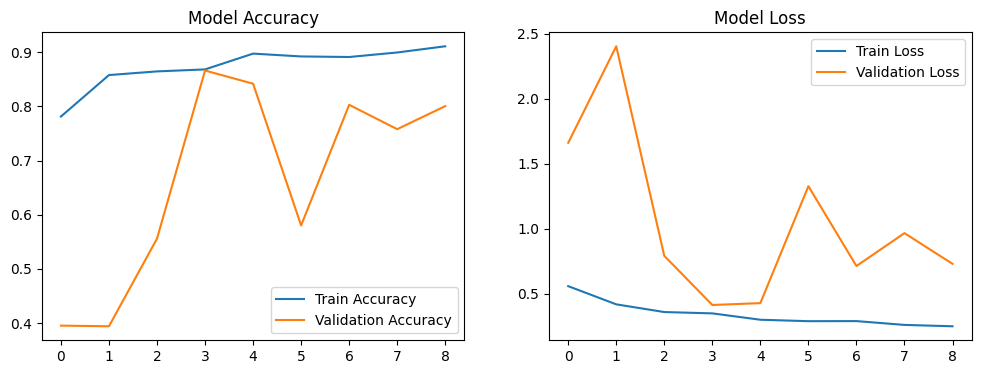

26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 377ms/step


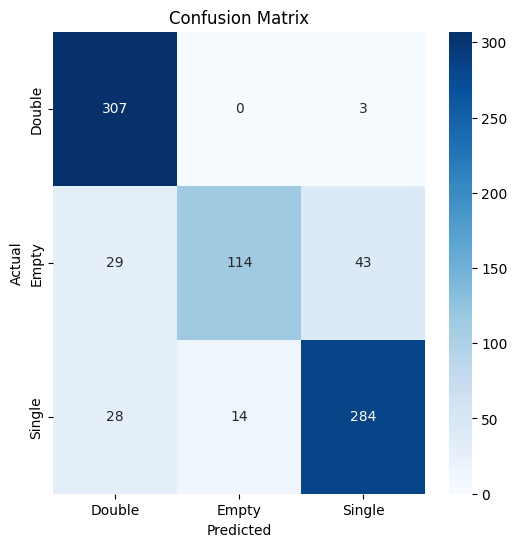

Final Validation Accuracy: 86.62%


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 📌 Set the base directory for your dataset
base_path = "/content/drive/MyDrive/avv_data/images/1s_segment_raw/1s_segment_raw/train_val_photos"

# 📌 Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values (0-1 range)
    validation_split=0.3,  # 80% training, 20% validation
    # rotation_range=30,     # Random rotation
    # width_shift_range=0.2,  # Horizontal shift
    # height_shift_range=0.2,  # Vertical shift
    # shear_range=0.2,       # Shear transformation
    # zoom_range=0.2,        # Random zoom
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip = True,
    fill_mode='nearest'
)

# 📌 Load Training Data
train_generator = datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),  # Resize images to match VGG16 input
    batch_size=32,
    class_mode='categorical',  # Multi-class classification
    subset='training',  # Training data
    shuffle=True
)

# 📌 Load Validation Data
validation_generator = datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Validation data
    shuffle=False  # No shuffle for validation
)

# 📌 Load Pre-trained VGG16 (Feature Extractor)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 📌 Freeze base model layers (we will fine-tune later)
for layer in base_model.layers[:15]:  # Freeze first 15 layers
    layer.trainable = False

# 📌 Build Custom Classifier on Top of VGG16
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Replaces Flatten(), better for feature extraction
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),  # Regularization to prevent overfitting
    Dense(3, activation='softmax')  # 3 output classes (AAVEmpty, AAVssDNA, AAVdsDNA)
])

# 📌 Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Small LR for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 📌 Callbacks: Early Stopping, LR Reduction, Checkpoint
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
checkpoint = ModelCheckpoint('best_vgg16_model.h5', monitor='val_accuracy', save_best_only=True)

# 📌 Train the Model
epochs = 20
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=[early_stop, lr_scheduler, checkpoint]
)

# 📌 Plot Training Results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

# 📌 Evaluate Model on Validation Set and Plot Confusion Matrix
validation_generator.reset()
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)  # Get predicted class indices
y_true = validation_generator.classes  # Get actual class indices
class_labels = list(validation_generator.class_indices.keys())  # Get class labels

# 📌 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 📌 Print Final Validation Accuracy
final_val_acc = max(history.history['val_accuracy']) * 100
print(f"Final Validation Accuracy: {final_val_acc:.2f}%")


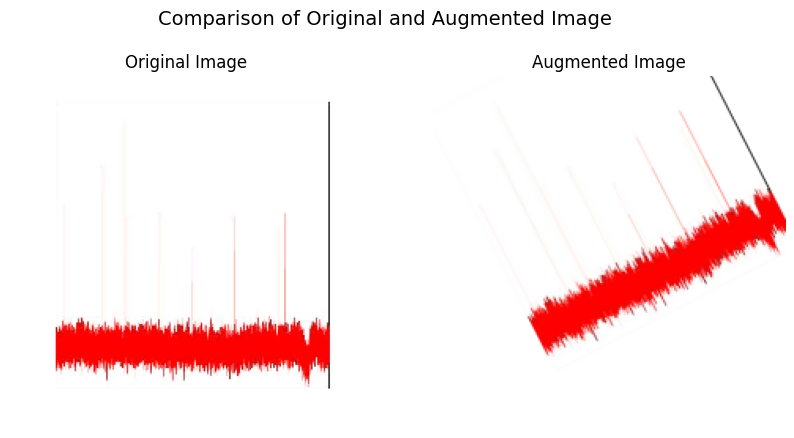

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 📌 Set the base directory for your dataset
image_path = "/content/drive/MyDrive/avv_data/images/1s_segment_raw/1s_segment_raw/train_val_photos/Empty/empty_1.jpg"
# 📌 Load the original image and resize to (224, 224)
original_img = load_img(image_path, target_size=(224, 224))
original_array = img_to_array(original_img)  # Convert to NumPy array

# 📌 Create an ImageDataGenerator with all transformations
aug_datagen = ImageDataGenerator(
    rescale=1./255,   # Normalize pixel values (0-1)
    rotation_range=30,
    width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True,
    fill_mode='nearest'
)

# 📌 Expand dims to create a batch of one image (required by flow())
original_batch = np.expand_dims(original_array, axis=0)

# 📌 Generate an augmented image
aug_iter = aug_datagen.flow(original_batch, batch_size=1)
augmented_array = next(aug_iter)[0]  # Extract the first (and only) image from batch

# 📌 Rescale augmented image for visualization (undo the generator rescaling)
augmented_array = np.clip(augmented_array, 0, 1)  # Ensure values are in valid range

# 📌 Plot the Original and Augmented Images Side by Side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_array.astype("uint8"))  # Convert back to display correctly
plt.title("Original Image")
plt.axis("off")

# Augmented Image
plt.subplot(1, 2, 2)
plt.imshow(augmented_array)  # No need to convert, since it's already scaled
plt.title("Augmented Image")
plt.axis("off")

plt.suptitle("Comparison of Original and Augmented Image", fontsize=14)
plt.show()

Found 1920 images belonging to 3 classes.
Found 822 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.7417 - loss: 0.5900

60/60 ━━━━━━━━━━━━━━━━━━━━ 30s 429ms/step - accuracy: 0.7430 - loss: 0.5875 - val_accuracy: 0.4027 - val_loss: 0.9683 - learning_rate: 1.0000e-04
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.8798 - loss: 0.3597

60/60 ━━━━━━━━━━━━━━━━━━━━ 24s 396ms/step - accuracy: 0.8798 - loss: 0.3592 - val_accuracy: 0.8674 - val_loss: 0.5878 - learning_rate: 1.0000e-04
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 351ms/step - accuracy: 0.8900 - loss: 0.2783 - val_accuracy: 0.4124 - val_loss: 1.3606 - learning_rate: 1.0000e-04
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 42s 377ms/step - accuracy: 0.9130 - loss: 0.2532 - val_accuracy: 0.7786 - val_loss: 0.5422 - learning_rate: 1.0000e-04
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 43s 418ms/step - accuracy: 0.9069 - loss: 0.2507 - val_accuracy: 0.7908 - val_loss: 0.5264 - learning_rate: 1.0000e-04
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 26s 433ms/step - accuracy: 0.9059 - loss: 0.2594 - val_accuracy: 0.8662 - val_loss: 0.4426 - learning_rate: 1.0000e-04
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 314ms/step - accuracy: 0.9011 - loss: 0.2520 - val_accuracy: 0.8127 - val_loss: 0.5411 - learning_rate: 1.0000e-04
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 356ms/step - accuracy: 0.91

60/60 ━━━━━━━━━━━━━━━━━━━━ 25s 407ms/step - accuracy: 0.9368 - loss: 0.1802 - val_accuracy: 0.8978 - val_loss: 0.3496 - learning_rate: 5.0000e-05
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.9385 - loss: 0.1581

60/60 ━━━━━━━━━━━━━━━━━━━━ 37s 337ms/step - accuracy: 0.9384 - loss: 0.1585 - val_accuracy: 0.8990 - val_loss: 0.3762 - learning_rate: 5.0000e-05
Epoch 12/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 329ms/step - accuracy: 0.9369 - loss: 0.1832 - val_accuracy: 0.8820 - val_loss: 0.4148 - learning_rate: 5.0000e-05
Epoch 13/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.9374 - loss: 0.1636
Epoch 13: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.


60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 324ms/step - accuracy: 0.9374 - loss: 0.1637 - val_accuracy: 0.9027 - val_loss: 0.3844 - learning_rate: 5.0000e-05
Epoch 14/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.9428 - loss: 0.1449

60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 340ms/step - accuracy: 0.9429 - loss: 0.1449 - val_accuracy: 0.9051 - val_loss: 0.3704 - learning_rate: 2.5000e-05
Epoch 15/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 319ms/step - accuracy: 0.9573 - loss: 0.1292 - val_accuracy: 0.8236 - val_loss: 0.6399 - learning_rate: 2.5000e-05


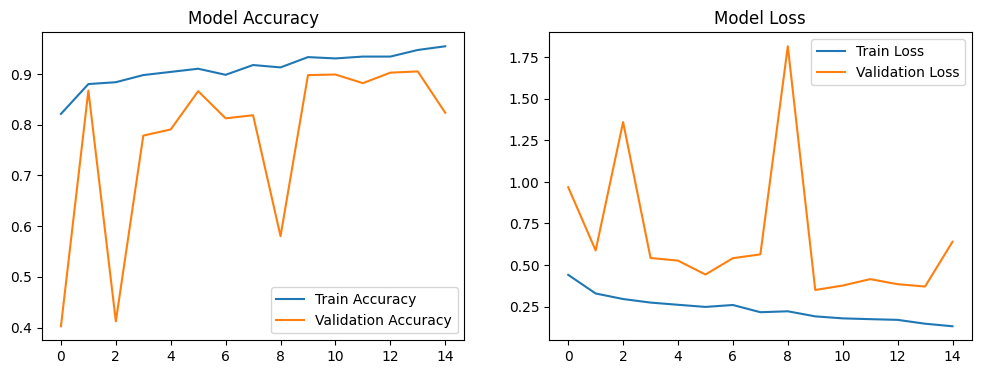

26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 261ms/step


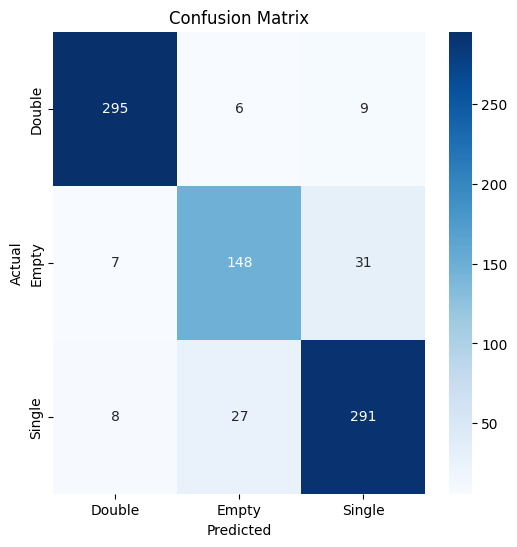

Final Validation Accuracy: 90.51%


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 📌 Set the base directory for your dataset
base_path = "/content/drive/MyDrive/avv_data/images/1s_segment_raw/1s_segment_raw/train_val_photos"

# 📌 Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values (0-1 range)
    validation_split=0.3,  # 80% training, 20% validation
    # rotation_range=30,     # Random rotation
    # width_shift_range=0.2,  # Horizontal shift
    # height_shift_range=0.2,  # Vertical shift
    # shear_range=0.2,       # Shear transformation
    # zoom_range=0.2,        # Random zoom
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip = True,
    fill_mode='nearest'
)

# 📌 Load Training Data
train_generator = datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),  # Resize images to match VGG16 input
    batch_size=32,
    class_mode='categorical',  # Multi-class classification
    subset='training',  # Training data
    shuffle=True
)

# 📌 Load Validation Data
validation_generator = datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Validation data
    shuffle=False  # No shuffle for validation
)

# 📌 Load Pre-trained VGG16 (Feature Extractor)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 📌 Freeze base model layers (we will fine-tune later)
for layer in base_model.layers[:15]:  # Freeze first 15 layers
    layer.trainable = False

# 📌 Build Custom Classifier on Top of VGG16
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Replaces Flatten(), better for feature extraction
    Dense(256, activation='relu'),
    BatchNormalization(),
    # Dropout(0.5),  # Regularization to prevent overfitting
    Dense(3, activation='softmax')  # 3 output classes (AAVEmpty, AAVssDNA, AAVdsDNA)
])

# 📌 Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Small LR for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 📌 Callbacks: Early Stopping, LR Reduction, Checkpoint
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
checkpoint = ModelCheckpoint('best_vgg16_model.h5', monitor='val_accuracy', save_best_only=True)

# 📌 Train the Model
epochs = 20
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=[early_stop, lr_scheduler, checkpoint]
)

# 📌 Plot Training Results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

# 📌 Evaluate Model on Validation Set and Plot Confusion Matrix
validation_generator.reset()
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)  # Get predicted class indices
y_true = validation_generator.classes  # Get actual class indices
class_labels = list(validation_generator.class_indices.keys())  # Get class labels

# 📌 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 📌 Print Final Validation Accuracy
final_val_acc = max(history.history['val_accuracy']) * 100
print(f"Final Validation Accuracy: {final_val_acc:.2f}%")


Found 1920 images belonging to 3 classes.
Found 822 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 558ms/step - accuracy: 0.6731 - loss: 0.7405

60/60 ━━━━━━━━━━━━━━━━━━━━ 58s 860ms/step - accuracy: 0.6746 - loss: 0.7379 - val_accuracy: 0.7214 - val_loss: 0.8193 - learning_rate: 1.0000e-04
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 575ms/step - accuracy: 0.8395 - loss: 0.4245

60/60 ━━━━━━━━━━━━━━━━━━━━ 51s 845ms/step - accuracy: 0.8394 - loss: 0.4248 - val_accuracy: 0.8662 - val_loss: 0.6541 - learning_rate: 1.0000e-04
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 89s 962ms/step - accuracy: 0.8612 - loss: 0.3657 - val_accuracy: 0.7324 - val_loss: 0.6522 - learning_rate: 1.0000e-04
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 49s 827ms/step - accuracy: 0.8731 - loss: 0.3377 - val_accuracy: 0.7409 - val_loss: 0.5468 - learning_rate: 1.0000e-04
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 55s 926ms/step - accuracy: 0.8733 - loss: 0.3323 - val_accuracy: 0.7628 - val_loss: 0.5562 - learning_rate: 1.0000e-04
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 49s 817ms/step - accuracy: 0.8807 - loss: 0.3048 - val_accuracy: 0.8613 - val_loss: 0.3639 - learning_rate: 1.0000e-04
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 48s 806ms/step - accuracy: 0.8853 - loss: 0.3088 - val_accuracy: 0.8564 - val_loss: 0.3979 - learning_rate: 1.0000e-04
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 49s 819ms/step - accuracy: 0.88

60/60 ━━━━━━━━━━━━━━━━━━━━ 50s 831ms/step - accuracy: 0.8823 - loss: 0.2957 - val_accuracy: 0.8759 - val_loss: 0.3078 - learning_rate: 5.0000e-05
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 48s 808ms/step - accuracy: 0.9123 - loss: 0.2361 - val_accuracy: 0.8747 - val_loss: 0.3350 - learning_rate: 5.0000e-05
Epoch 12/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.9034 - loss: 0.2545

60/60 ━━━━━━━━━━━━━━━━━━━━ 50s 833ms/step - accuracy: 0.9034 - loss: 0.2545 - val_accuracy: 0.8844 - val_loss: 0.3174 - learning_rate: 5.0000e-05
Epoch 13/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 575ms/step - accuracy: 0.9035 - loss: 0.2434
Epoch 13: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
60/60 ━━━━━━━━━━━━━━━━━━━━ 49s 823ms/step - accuracy: 0.9033 - loss: 0.2438 - val_accuracy: 0.8747 - val_loss: 0.3396 - learning_rate: 5.0000e-05
Epoch 14/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 48s 802ms/step - accuracy: 0.9074 - loss: 0.2481 - val_accuracy: 0.8808 - val_loss: 0.3271 - learning_rate: 2.5000e-05
Epoch 15/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 49s 817ms/step - accuracy: 0.8933 - loss: 0.2686 - val_accuracy: 0.8832 - val_loss: 0.3156 - learning_rate: 2.5000e-05


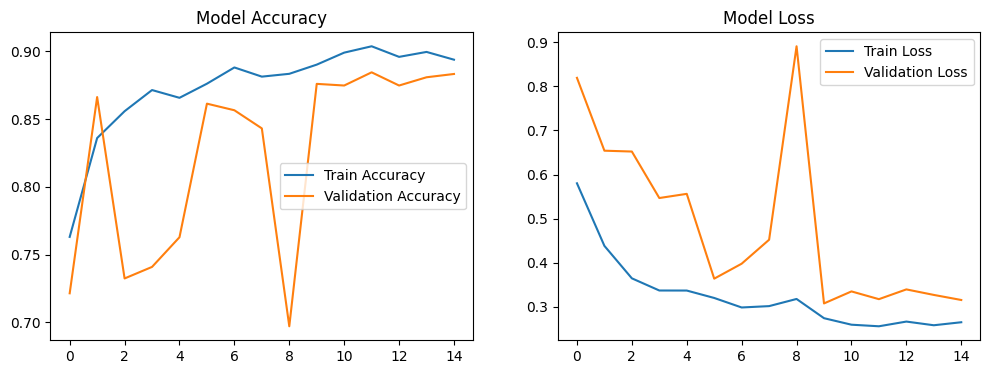

26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 561ms/step


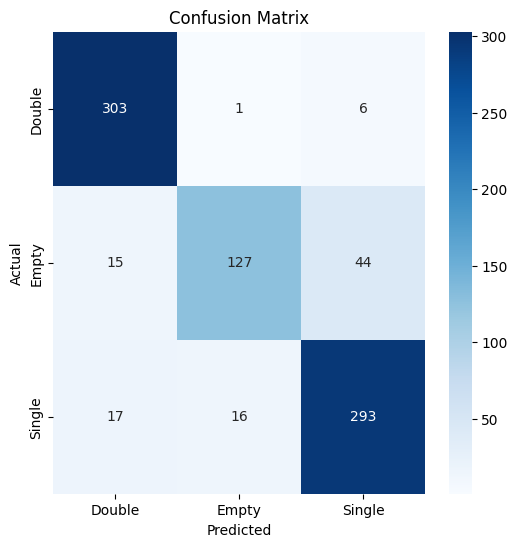

Final Validation Accuracy: 88.44%


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 📌 Set the base directory for your dataset
base_path = "/content/drive/MyDrive/avv_data/images/1s_segment_raw/1s_segment_raw/train_val_photos"

# 📌 Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values (0-1 range)
    validation_split=0.3,  # 80% training, 20% validation
    # rotation_range=30,     # Random rotation
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,       # Shear transformation
    zoom_range=0.2,        # Random zoom
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip = True,
    fill_mode='nearest'
)

# 📌 Load Training Data
train_generator = datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),  # Resize images to match VGG16 input
    batch_size=32,
    class_mode='categorical',  # Multi-class classification
    subset='training',  # Training data
    shuffle=True
)

# 📌 Load Validation Data
validation_generator = datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Validation data
    shuffle=False  # No shuffle for validation
)

#  Load Pre-trained VGG16 (Feature Extractor)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#  Freeze base model layers (we will fine-tune later)
for layer in base_model.layers[:15]:  # Freeze first 15 layers
    layer.trainable = False

#  Build Custom Classifier on Top of VGG16
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Replaces Flatten(), better for feature extraction
    Dense(256, activation='relu'),
    BatchNormalization(),
    # Dropout(0.5),  # Regularization to prevent overfitting
    Dense(3, activation='softmax')  # 3 output classes (AAVEmpty, AAVssDNA, AAVdsDNA)
])

#  Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Small LR for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 📌 Callbacks: Early Stopping, LR Reduction, Checkpoint
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
checkpoint = ModelCheckpoint('best_vgg16_model.h5', monitor='val_accuracy', save_best_only=True)

# 📌 Train the Model
epochs = 20
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=[early_stop, lr_scheduler, checkpoint]
)

# 📌 Plot Training Results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

# 📌 Evaluate Model on Validation Set and Plot Confusion Matrix
validation_generator.reset()
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)  # Get predicted class indices
y_true = validation_generator.classes  # Get actual class indices
class_labels = list(validation_generator.class_indices.keys())  # Get class labels

# 📌 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 📌 Print Final Validation Accuracy
final_val_acc = max(history.history['val_accuracy']) * 100
print(f"Final Validation Accuracy: {final_val_acc:.2f}%")


26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 543ms/step


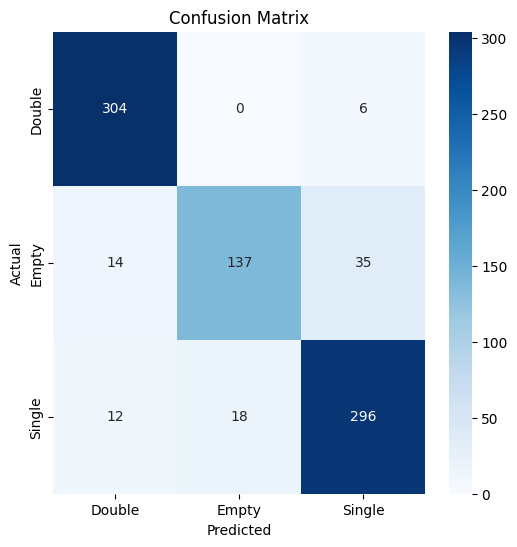

Final Validation Accuracy: 88.44%

Classwise Accuracy:
Double: 98.06%
Empty: 73.66%
Single: 90.80%


In [ ]:

# 📌 Evaluate Model on Validation Set and Plot Confusion Matrix
validation_generator.reset()
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)  # Get predicted class indices
y_true = validation_generator.classes  # Get actual class indices
class_labels = list(validation_generator.class_indices.keys())  # Get class labels

# 📌 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 📌 Print Final Validation Accuracy
final_val_acc = max(history.history['val_accuracy']) * 100
print(f"Final Validation Accuracy: {final_val_acc:.2f}%")

# 📌 Compute Classwise Accuracy
# For each class, divide the diagonal element by the total number of true samples in that class.
classwise_acc = cm.diagonal() / cm.sum(axis=1)
print("\nClasswise Accuracy:")
for idx, acc in enumerate(classwise_acc):
    print(f"{class_labels[idx]}: {acc * 100:.2f}%")

In [1]:
import os
print("Current notebook location:", os.getcwd())


Current notebook location: /content


In [2]:
!realpath avv_classification_vgg16.ipynb


/content/avv_classification_vgg16.ipynb
